We first need to load the spinGlass data and modules.

In [2]:
from RRR import *
from linProject import *
from spinGlassProject import *
from rankProject import *

n = 40

f = open('spinglassH', 'r')
l = f.readlines()
f.close()
ll = [line.split() for line in l]
lll = [[float(s) for s in line] for line in ll]
H = np.array(lll)

A = semiDefProject(np.random.rand(n, n)*2 - 1)

print spinGlassProject(A)

[[ 1. -1. -1. ..., -1. -1. -1.]
 [-1.  1.  1. ...,  1.  1.  1.]
 [-1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [-1.  1.  1. ...,  1.  1.  1.]
 [-1.  1.  1. ...,  1.  1.  1.]
 [-1.  1.  1. ...,  1.  1.  1.]]


Now, we should really test the setup. I recall from class that the true minimum energy was around $-230$, so let's try projecting onto $-190$.

In [24]:
target = -200

A = semiDefProject(2*np.random.rand(n, n)-1)

Y, errors, sols = RRR(A, 
                    lambda x: lowerBoundProject(x, H, 2*target), #2, because each prodct appears twice: si*sj and sj*si
                    spinGlassProject,
                    0.5, 1e-12, 10000, True)

In [25]:
print sols

[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]


In [26]:
spins = extractSpins(sols)
print spins

print 0.5*np.sum(np.outer(spins, spins)*H)

[-1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1.  1. -1. -1.
 -1.  1. -1.  1.  1. -1.  1.  1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1.
 -1. -1. -1. -1.]
-212.436679919


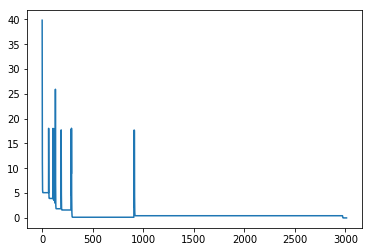

In [27]:
plt.plot(errors)
plt.show()

Fantastic. We are capable of reaching a reasonably low energy.

How low can we expect to go?

### How low can we go?

Well, the below calculation gives the standard deviation of a "typical" set of spins.

In [30]:
var =  np.sum(H*H)/(40*39)
num =  20*39. #Free variables in this thing.

sig = (num*var)**0.5

print sig



39.9191932285


What we really have is a Gumbel distribution, with $2^{40}$ samples.

We can approximate the minimum expected value in two common ways: the inverse error function, or with an estimate that's abundant online.


In [96]:
exp = 0 - sig*np.sqrt(2*40*math.log(2))
print exp

from scipy.special import erfinv

exp2 = sig*np.sqrt(2)*erfinv(-1+(2**(-39)))
print exp2

-297.262057598
-281.338508362


Let's go for that target.

In [55]:
target = -205

A = semiDefProject(2*np.random.rand(n, n)-1)

Y, errors, sols = RRR(A, 
                    lambda x: lowerBoundProject(x, H, 2*target), 
                    spinGlassProject,
                    0.5, 1e-12, 50000, True)

[-1.  1.  1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1. -1. -1.
  1.  1. -1.  1.  1. -1. -1.  1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1.
 -1. -1. -1. -1.]
-210.046002488


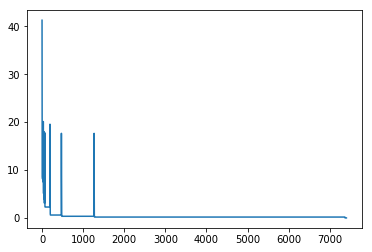

In [56]:
spins = extractSpins(sols)

print spins

print 0.5*np.sum(np.outer(spins, spins)*H)

plt.plot(errors)
plt.show()

Clearly, we can go fairly low -- we have a $-212$ and a $-210$ already. Let's keep going.

In [80]:
target = -205

A = semiDefProject(2*np.random.rand(n, n)-1)

Y, errors, sols = RRR(A, 
                    lambda x: lowerBoundProject(x, H, 2*target), 
                    spinGlassProject,
                    0.5, 1e-12, 10000, True)

[-1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1. -1. -1.
  1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1.  1.  1.  1. -1.  1.  1.
 -1. -1. -1. -1.]
-218.06824561


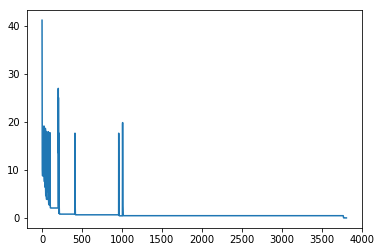

In [81]:
spins = extractSpins(sols)

print spins

print 0.5*np.sum(np.outer(spins, spins)*H)

plt.plot(errors)
plt.show()

Lowest yet!

Anything further?

In [111]:
target = -260

A = semiDefProject(2*np.random.rand(n, n)-1)

Y, errors, sols = RRR(A, 
                    lambda x: lowerBoundProject(x, H, 2*target), 
                    spinGlassProject,
                    0.5, 1e-12, 500, True)

[-1.  1.  1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1. -1. -1.
  1.  1. -1.  1.  1.  1.  1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1.  1.
 -1. -1. -1. -1.]
-217.19843627


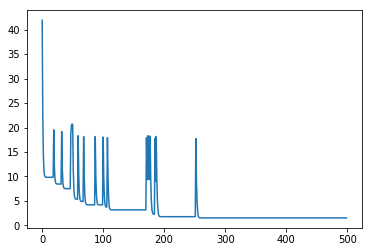

In [112]:
spins = extractSpins(sols)

print spins

print 0.5*np.sum(np.outer(spins, spins)*H)

plt.plot(errors)
plt.show()

Something else close. Before moving on, let's keep this one.

In [164]:
target = -240

A = semiDefProject(2*np.random.rand(n, n)-1)

Y, errors, sols = RRR(A, 
                    lambda x: lowerBoundProject(x, H, 2*target), 
                    spinGlassProject,
                    0.01, 1e-12, 20000, True)

[-1.  1.  1. -1. -1.  1. -1.  1. -1.  1. -1.  1.  1. -1.  1.  1. -1. -1.
  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.  1.
 -1. -1. -1. -1.]
-172.434860228


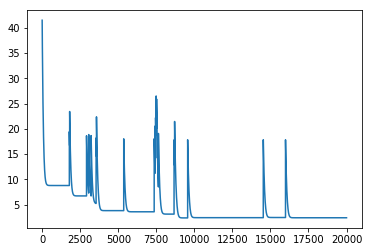

In [165]:
spins = extractSpins(sols)

print spins

print 0.5*np.sum(np.outer(spins, spins)*H)
plt.plot(errors)
plt.show()

This is definitely not what we want.

It should be noted that there is an attractor for routines that do not converge. They seem to really like a certain arrangement of spins, and stay there for a while:

In [166]:
target = -240

A = semiDefProject(2*np.random.rand(n, n)-1)

Y, errors, sols = RRR(A, 
                    lambda x: lowerBoundProject(x, H, 2*target), 
                    spinGlassProject,
                    0.5, 1e-12, 10000, True)

[-1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1. -1.  1. -1.  1. -1. -1.
  1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.
  1. -1.  1. -1.]
236.561109487


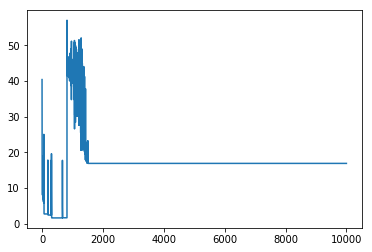

In [167]:
spins = extractSpins(sols)

print spins

print 0.5*np.sum(np.outer(spins, spins)*H)
plt.plot(errors)
plt.show()

This arrangement, and the energy $236.6$, came up very frequently when the problem did not converge.

I suspect this happens when $Y$ get's launched out of the problem space, and is projected on the nearest point of the convex hull.

## Conclusion

There is clearly work to be done. There is a significant gap between the lowest expected energy and the states I am finding.

I do not think that I came close to the complete solution, at all. However, it should be noted that the ground energies I found -- $-217, -218$ -- are much better than random search, which cannot find anything below $-200$.